In [1]:
import sys
# setting path
sys.path.append('../')

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Ruta a las imágenes .tiff
TIFF_DIR = "/data/datasets/PANDA/PANDA_original/original/train_images"

# Listar los primeros 5 archivos .tiff del directorio
tiff_files = sorted([f for f in os.listdir(TIFF_DIR) if f.endswith(".tiff")])[:5]
assert len(tiff_files) >= 5, f"Se encontraron solo {len(tiff_files)} archivos TIFF"

# Mostrar cada imagen
plt.figure(figsize=(20, 10))
for i, filename in enumerate(tiff_files):
    img_path = os.path.join(TIFF_DIR, filename)
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(filename[:8] + "...")

plt.suptitle("Primeras 5 imágenes TIFF del dataset", fontsize=16)
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [10]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Ruta a las imágenes .tiff
TIFF_DIR = "/data/datasets/PANDA/PANDA_original/original/train_images"

# Configuración de parches
GRID_ROWS = 6     # Número de filas de parches
GRID_COLS = 6     # Número de columnas de parches

# Obtener la primera imagen del dataset
tiff_files = sorted([f for f in os.listdir(TIFF_DIR) if f.endswith(".tiff")])
filename = tiff_files[0]

print(f"Procesando: {filename}")

# Cargar imagen original
img_path = os.path.join(TIFF_DIR, filename)
img_original = cv2.imread(img_path, cv2.IMREAD_COLOR)
img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)

height_orig, width_orig = img_original_rgb.shape[:2]
print(f"Dimensiones originales: {width_orig}x{height_orig}")

# Calcular tamaño de parches basado en las dimensiones completas de la imagen
PATCH_WIDTH = width_orig // GRID_COLS
PATCH_HEIGHT = height_orig // GRID_ROWS

print(f"Tamaño de parche calculado: {PATCH_WIDTH}x{PATCH_HEIGHT}")
print(f"Grid: {GRID_ROWS}x{GRID_COLS} parches")

# 1. IMAGEN ORIGINAL LIMPIA
print("Generando imagen original limpia...")
plt.figure(figsize=(12, 12))
plt.imshow(img_original_rgb)
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig('01_original_clean.png', dpi=300, bbox_inches='tight', 
            pad_inches=0, facecolor='white')
plt.close()

# 2. IMAGEN ORIGINAL CON GRID SUPERPUESTO
print("Generando imagen original con grid...")
plt.figure(figsize=(12, 12))
plt.imshow(img_original_rgb)

# Dibujar grid superpuesto sobre toda la imagen
for i in range(GRID_ROWS + 1):
    y = i * PATCH_HEIGHT
    plt.axhline(y=y, color='red', linewidth=2, alpha=0.7)

for j in range(GRID_COLS + 1):
    x = j * PATCH_WIDTH
    plt.axvline(x=x, color='red', linewidth=2, alpha=0.7)

# Numerar los parches
for i in range(GRID_ROWS):
    for j in range(GRID_COLS):
        patch_num = i * GRID_COLS + j + 1
        center_x = j * PATCH_WIDTH + PATCH_WIDTH // 2
        center_y = i * PATCH_HEIGHT + PATCH_HEIGHT // 2
        plt.text(center_x, center_y, str(patch_num), 
                ha='center', va='center', fontsize=16, 
                color='yellow', weight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7))

plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig('02_original_with_grid.png', dpi=300, bbox_inches='tight', 
            pad_inches=0, facecolor='white')
plt.close()

# 3. EXTRAER PARCHES INDIVIDUALES
print("Extrayendo parches individuales...")
patches_folder = "patches"
os.makedirs(patches_folder, exist_ok=True)

for i in range(GRID_ROWS):
    for j in range(GRID_COLS):
        # Calcular coordenadas del parche
        patch_start_y = i * PATCH_HEIGHT
        patch_end_y = (i + 1) * PATCH_HEIGHT
        patch_start_x = j * PATCH_WIDTH
        patch_end_x = (j + 1) * PATCH_WIDTH
        
        # Asegurar que no se salga de los límites
        patch_end_y = min(patch_end_y, height_orig)
        patch_end_x = min(patch_end_x, width_orig)
        
        # Extraer parche de la imagen original
        patch = img_original_rgb[patch_start_y:patch_end_y, patch_start_x:patch_end_x]
        
        # Guardar parche individual
        patch_num = i * GRID_COLS + j + 1
        patch_filename = f'{patches_folder}/patch_{patch_num:02d}.png'
        
        plt.figure(figsize=(8, 8))
        plt.imshow(patch)
        plt.axis('off')
        plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
        plt.savefig(patch_filename, dpi=300, bbox_inches='tight', 
                    pad_inches=0, facecolor='white')
        plt.close()
        
        print(f"Parche {patch_num:02d} guardado: {patch.shape[1]}x{patch.shape[0]} píxeles")

print("\n=== ARCHIVOS GENERADOS ===")
print("1. 01_original_clean.png - Imagen original sin elementos adicionales")
print("2. 02_original_with_grid.png - Imagen original con grid completo superpuesto")
print(f"3. Carpeta 'patches/' - {GRID_ROWS*GRID_COLS} parches individuales")
print(f"   - patch_01.png a patch_{GRID_ROWS*GRID_COLS:02d}.png")
print(f"\nConfiguración utilizada:")
print(f"- Tamaño de parche: {PATCH_WIDTH}x{PATCH_HEIGHT} píxeles")
print(f"- Grid: {GRID_ROWS}x{GRID_COLS} parches")
print(f"- Cobertura: Imagen completa ({width_orig}x{height_orig} píxeles)")

Procesando: 0005f7aaab2800f6170c399693a96917.tiff
Dimensiones originales: 27648x29440
Tamaño de parche calculado: 4608x4906
Grid: 6x6 parches
Generando imagen original limpia...
Generando imagen original con grid...
Extrayendo parches individuales...
Parche 01 guardado: 4608x4906 píxeles
Parche 02 guardado: 4608x4906 píxeles
Parche 03 guardado: 4608x4906 píxeles
Parche 04 guardado: 4608x4906 píxeles
Parche 05 guardado: 4608x4906 píxeles
Parche 06 guardado: 4608x4906 píxeles
Parche 07 guardado: 4608x4906 píxeles
Parche 08 guardado: 4608x4906 píxeles
Parche 09 guardado: 4608x4906 píxeles
Parche 10 guardado: 4608x4906 píxeles
Parche 11 guardado: 4608x4906 píxeles
Parche 12 guardado: 4608x4906 píxeles
Parche 13 guardado: 4608x4906 píxeles
Parche 14 guardado: 4608x4906 píxeles
Parche 15 guardado: 4608x4906 píxeles
Parche 16 guardado: 4608x4906 píxeles
Parche 17 guardado: 4608x4906 píxeles
Parche 18 guardado: 4608x4906 píxeles
Parche 19 guardado: 4608x4906 píxeles
Parche 20 guardado: 4608x49

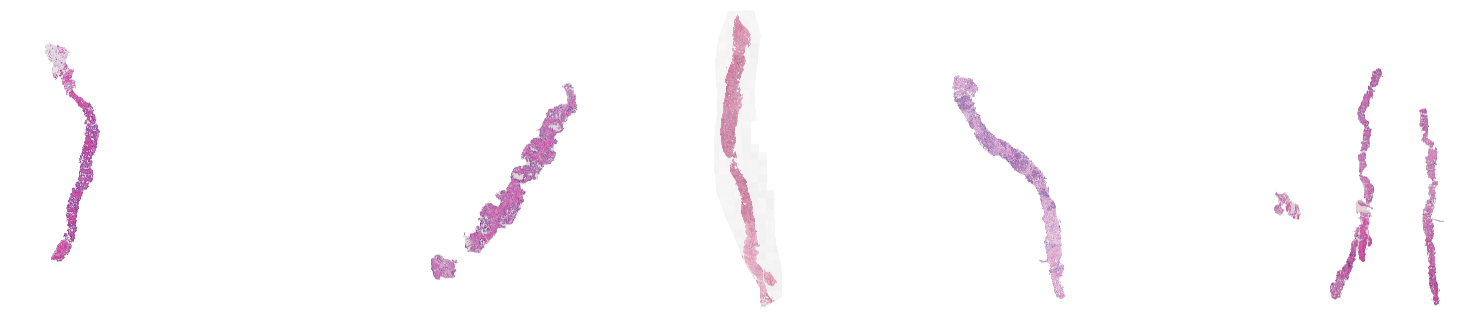

In [6]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Ruta a las imágenes .tiff
TIFF_DIR = "/data/datasets/PANDA/PANDA_original/original/train_images"

# Listar los primeros 5 archivos .tiff del directorio
tiff_files = sorted([f for f in os.listdir(TIFF_DIR) if f.endswith(".tiff")])[:5]
assert len(tiff_files) >= 5, f"Se encontraron solo {len(tiff_files)} archivos TIFF"

# Configurar el estilo para publicación
plt.style.use('default')
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Ajustar espaciado
plt.subplots_adjust(wspace=0.02, hspace=0)

for i, filename in enumerate(tiff_files):
    img_path = os.path.join(TIFF_DIR, filename)
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Mostrar imagen sin bordes ni ejes
    axes[i].imshow(img_rgb)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].spines['left'].set_visible(False)

# Remover espacios en blanco alrededor de la figura
plt.tight_layout(pad=0)

# Guardar con alta resolución para paper
plt.savefig('histopathology_samples.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()


/tmp/ipykernel_66065/3137421961.py:74: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(MODEL_PATH, map_location=device))


Modelo MIL cargado desde: /home/javitrucas/TFG/notebooks/models/panda/model_attention.pth
Capa de proyección de características creada: 2048 -> 1024

Buscando una WSI con true_label > 0 para visualización...


Buscando WSI positiva:   0%|          | 2/10616 [00:00<00:37, 282.25it/s]



--> WSI positiva seleccionada (ISUP Grade 4, Pred.Prob 0.6275): 0018ae58b01bdadc8e347995b69f99aa
Features cargadas: torch.Size([129, 2048]) para 0018ae58b01bdadc8e347995b69f99aa
Coordenadas cargadas: (129, 2) para 0018ae58b01bdadc8e347995b69f99aa
Calculando pesos de atención para 129 parches...
Atención calculada. Total de parches: 129

Visualizando WSI: 0018ae58b01bdadc8e347995b69f99aa
Predicción (probabilidad de ser positivo): 0.6275
Etiqueta real: Instancia Positiva (ISUP Grade: 4)
Thumbnail de WSI cargado (368x1584 píxeles).
Heatmap guardado en: /home/javitrucas/TFG/results/panda_heatmaps/_heatmap.png


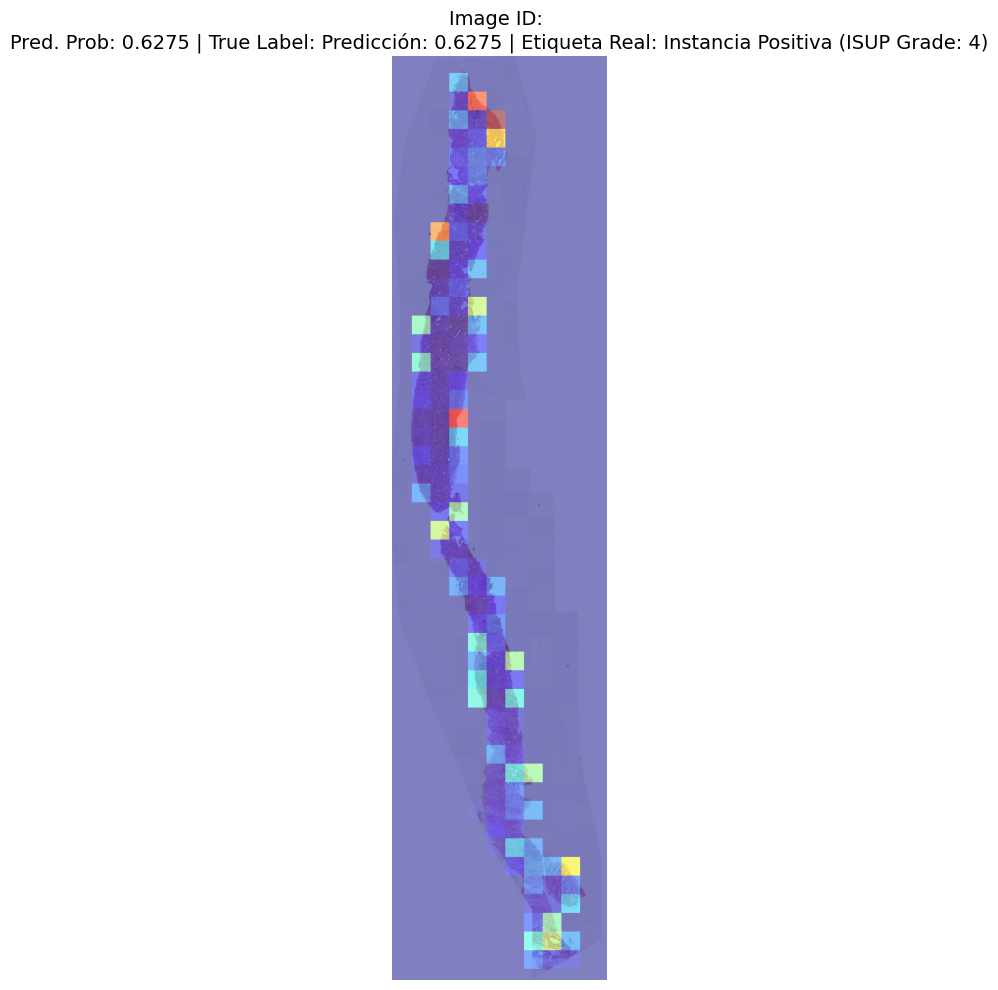


Proceso de visualización de WSI completado.


In [19]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
import torch
from tqdm import tqdm
from PIL import Image
import openslide # Crucial for WSI
from argparse import Namespace # Para config object
import torch.nn as nn # Necesario para nn.Linear
import h5py # Para leer archivos .h5

# Aumentar límite de PIL para imágenes grandes
Image.MAX_IMAGE_PIXELS = None # O Image.MAX_PIXELS_APPROX = None para PIL 9.1.0+

# --- CONFIGURACIÓN DE RUTAS E IMPORTACIONES ---
project_root = "/home/javitrucas/TFG"
if project_root not in sys.path:
    sys.path.append(project_root)

try:
    from scripts.model import MILModel
    from scripts.plot_utils import plot_wsi_and_heatmap, normalize
    # Asegúrate de que dataset_loader y MIL_utils están disponibles si los usas en otras partes
    # (Comentados si no se usan directamente en este script para mantenerlo limpio)
    # from scripts.dataset_loader import load_dataset
    # from scripts.MIL_utils import MIL_collate_fn
except (ImportError, ModuleNotFoundError) as e:
    print(f"Error importando módulos: {e}")
    print("Asegúrate de que la estructura de tu proyecto y el `sys.path` son correctos.")
    sys.exit()

# --- Configuración de guardado y paths ---
SAVE = True
SAVE_PATH = '/home/javitrucas/TFG/results/panda_heatmaps/'
# FIGSIZE = (10, 10) # Esta variable no se usa en el script, se puede eliminar
SAVE_EXTENSION = 'png'
os.makedirs(SAVE_PATH, exist_ok=True)
plt.rcParams.update({'font.size': 20})

DATA_DIR = '/data/datasets/PANDA/PANDA_original/original/'
TRAIN_IMAGES_DIR = os.path.join(DATA_DIR, 'train_images')
CSV_PATH = os.path.join(DATA_DIR, 'train.csv')
MODEL_PATH = '/home/javitrucas/TFG/notebooks/models/panda/model_attention.pth' 

# --- Parámetros de Extracción y Modelo ---
PATCH_SIZE = 512
# RESIZE_SIZE = 112 # No se usa en este script, se puede eliminar
MAX_PATCHES = 2000 
INPUT_FEATURE_DIM_ACTUAL = 2048 
INPUT_FEATURE_DIM_MODEL_EXPECTS = 1024 
FEATURE_DIM = 128 

# --- Parámetros de Visualización Específicos ---
WSI_LEVEL_FOR_THUMBNAIL = 2 
# WSI_TO_VISUALIZE_ID se determinará dinámicamente

# --- PATHS REALES PARA FEATURES Y COORDENADAS ---
PANDA_FEATURES_ROOT = '/data/datasets/PANDA/PANDA_original/patches_512_preset/features_resnet50/'
PANDA_COORDS_ROOT = '/data/datasets/PANDA/PANDA_original/patches_512_preset/coords/'

# --- 1. CARGAR MODELO ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = MILModel(
    pooling_type='attention', 
    input_feature_dim=INPUT_FEATURE_DIM_MODEL_EXPECTS,
    feature_dim=FEATURE_DIM
)

try:
    model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
    model.to(device)
    model.eval()
    print(f"Modelo MIL cargado desde: {MODEL_PATH}")
except FileNotFoundError:
    print(f"ERROR: No se encontró el modelo en: {MODEL_PATH}")
    sys.exit()
except Exception as e:
    print(f"ERROR al cargar el modelo: {e}")
    sys.exit()

feature_projector = nn.Linear(INPUT_FEATURE_DIM_ACTUAL, INPUT_FEATURE_DIM_MODEL_EXPECTS).to(device)
print(f"Capa de proyección de características creada: {INPUT_FEATURE_DIM_ACTUAL} -> {INPUT_FEATURE_DIM_MODEL_EXPECTS}")

# --- SELECCIONAR UNA WSI CON TRUE_LABEL > 0 ---
print("\nBuscando una WSI con true_label > 0 para visualización...")
WSI_TO_VISUALIZE_ID = None
true_label_wsi_raw = None # Guardará el ISUP grade real
pre_calculated_pred_prob = None # Guardará la probabilidad de predicción para el ID seleccionado

try:
    df_train = pd.read_csv(CSV_PATH)
except Exception as e:
    print(f"ERROR: No se pudo cargar train.csv desde {CSV_PATH}: {e}")
    sys.exit()

# Iterar sobre el DataFrame para encontrar una WSI con ISUP Grade > 0
for idx, row in tqdm(df_train.iterrows(), total=df_train.shape[0], desc="Buscando WSI positiva"):
    current_image_id = row['image_id']
    current_isup_grade = row['isup_grade']

    if current_isup_grade > 0: # Buscamos una instancia positiva
        features_file_path = os.path.join(PANDA_FEATURES_ROOT, f"{current_image_id}.npy")
        coords_file_path = os.path.join(PANDA_COORDS_ROOT, f"{current_image_id}.h5")

        # Verificar si existen los archivos de features y coordenadas para esta WSI
        if os.path.exists(features_file_path) and os.path.exists(coords_file_path):
            try:
                # Cargar features y calcular predicción para verificar la existencia de datos válidos
                temp_features_np = np.load(features_file_path)
                if temp_features_np.shape[1] != INPUT_FEATURE_DIM_ACTUAL:
                    continue # Saltar si la dimensión de la feature es incorrecta
                
                if temp_features_np.shape[0] > MAX_PATCHES:
                    temp_features_np = temp_features_np[:MAX_PATCHES]

                temp_features_tensor = torch.from_numpy(temp_features_np).float().to(device)

                with torch.no_grad():
                    temp_projected_features = feature_projector(temp_features_tensor) 
                    temp_bag_tensor_for_model = temp_projected_features.unsqueeze(0) 
                    temp_prediction, _ = model(temp_bag_tensor_for_model)
                    temp_prediction_prob = torch.sigmoid(temp_prediction).item()
                
                # Si llegamos aquí, hemos encontrado una WSI válida y positiva
                WSI_TO_VISUALIZE_ID = current_image_id
                true_label_wsi_raw = current_isup_grade
                pre_calculated_pred_prob = temp_prediction_prob
                print(f"\n--> WSI positiva seleccionada (ISUP Grade {true_label_wsi_raw}, Pred.Prob {pre_calculated_pred_prob:.4f}): {WSI_TO_VISUALIZE_ID}")
                break # Salir del bucle una vez que se encuentra una WSI adecuada

            except Exception as e:
                # Continuar buscando si hay un error al procesar esta WSI
                print(f"Advertencia: Error al procesar {current_image_id}: {e}. Saltando.")
                continue

if WSI_TO_VISUALIZE_ID is None:
    print("ERROR: No se encontró ninguna WSI con true_label > 0 y archivos de features/coordenadas válidos.")
    sys.exit()

# --- 2. PREPARAR DATOS PARA LA WSI ESPECÍFICA SELECCIONADA ---

wsi_path = os.path.join(TRAIN_IMAGES_DIR, f"{WSI_TO_VISUALIZE_ID}.tiff")
features_file_path = os.path.join(PANDA_FEATURES_ROOT, f"{WSI_TO_VISUALIZE_ID}.npy")
coords_file_path = os.path.join(PANDA_COORDS_ROOT, f"{WSI_TO_VISUALIZE_ID}.h5")

# Cargar las features para la WSI específica (ya comprobadas en la selección)
try:
    all_features_np = np.load(features_file_path)
    if all_features_np.shape[0] > MAX_PATCHES:
        all_features_np = all_features_np[:MAX_PATCHES]
    features_tensor = torch.from_numpy(all_features_np).float().to(device)
    print(f"Features cargadas: {features_tensor.shape} para {WSI_TO_VISUALIZE_ID}")
except Exception as e:
    print(f"ERROR al cargar o procesar el archivo de features {features_file_path}: {e}")
    sys.exit()

# Cargar las coordenadas para la WSI específica
try:
    with h5py.File(coords_file_path, 'r') as f:
        if 'coords' in f: 
            all_coords = f['coords'][:] 
        else:
            print(f"ERROR: No se encontró el dataset 'coords' en el archivo HDF5 {coords_file_path}. "
                  f"Datasets disponibles: {list(f.keys())}")
            sys.exit()

    if all_coords.shape[0] != features_tensor.shape[0]:
        print(f"Advertencia: El número de coordenadas ({all_coords.shape[0]}) no coincide con el número de features ({features_tensor.shape[0]}). Ajustando.")
        all_coords = all_coords[:features_tensor.shape[0]] 
    print(f"Coordenadas cargadas: {all_coords.shape} para {WSI_TO_VISUALIZE_ID}")
except Exception as e:
    print(f"ERROR al cargar o procesar el archivo de coordenadas {coords_file_path}: {e}")
    sys.exit()


# --- 3. OBTENER PESOS DE ATENCIÓN ---
print(f"Calculando pesos de atención para {features_tensor.shape[0]} parches...")
with torch.no_grad():
    projected_features = feature_projector(features_tensor) 
    bag_tensor_for_model = projected_features.unsqueeze(0) 
    
    # Re-calcular para asegurar que coincide con el tensor actual si hubo un recorte por MAX_PATCHES
    prediction, attention_weights = model(bag_tensor_for_model)
    
    attention_weights = attention_weights.squeeze(0).cpu().numpy() 
    prediction_prob = torch.sigmoid(prediction).item() # Usar la predicción actual

print(f"Atención calculada. Total de parches: {len(attention_weights)}")

normalized_attention = normalize(attention_weights)

# --- 4. CARGAR WSI Y VISUALIZAR ---
print(f"\nVisualizando WSI: {WSI_TO_VISUALIZE_ID}")
print(f"Predicción (probabilidad de ser positivo): {prediction_prob:.4f}")

# Formatear la etiqueta real para el título de la imagen
true_label_display = f"Instancia Positiva (ISUP Grade: {true_label_wsi_raw})"
print(f"Etiqueta real: {true_label_display}")

# Cargar la WSI para obtener un thumbnail
try:
    slide = openslide.OpenSlide(wsi_path)
    
    thumbnail_dims = slide.level_dimensions[WSI_LEVEL_FOR_THUMBNAIL]
    
    wsi_thumbnail = slide.read_region((0, 0), WSI_LEVEL_FOR_THUMBNAIL, thumbnail_dims)
    wsi_thumbnail = np.array(wsi_thumbnail)[:, :, :3] 
    
    downsample_factor = slide.level_downsamples[WSI_LEVEL_FOR_THUMBNAIL] 
    
    slide.close()
    print(f"Thumbnail de WSI cargado ({wsi_thumbnail.shape[1]}x{wsi_thumbnail.shape[0]} píxeles).")

except Exception as e:
    print(f"ERROR: No se pudo cargar la WSI thumbnail con openslide para {WSI_TO_VISUALIZE_ID}: {e}")
    sys.exit()

if len(all_coords) != len(normalized_attention):
    print("CRÍTICO: El número de coordenadas y scores de atención NO COINCIDE después del preprocesamiento. El heatmap será incorrecto.")
    sys.exit()

# Llamar a tu función plot_wsi_and_heatmap
# Pasa un image_id vacío para que el título no lo incluya
plot_wsi_and_heatmap(
    wsi_image=wsi_thumbnail, 
    attention_scores=normalized_attention,
    patch_coords=all_coords, 
    patch_size=PATCH_SIZE,    
    level_downsample_factor=downsample_factor, 
    image_id="", # Vacío para que el título solo tenga Predicción y Etiqueta Real
    pred_prob=prediction_prob,
    true_label=f"Predicción: {prediction_prob:.4f} | Etiqueta Real: {true_label_display}", # Título conciso
    save_path=SAVE_PATH if SAVE else None,
    save_extension=SAVE_EXTENSION
)

print("\nProceso de visualización de WSI completado.")